In [1]:
import pandas as pd
import numpy as np
from numbers import Number
%matplotlib inline

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Mean, Median and Mode. 

In [3]:
# Let's build a data set
df = pd.DataFrame([
 { 'name': 'Mary', 'salary': 120000.00 } ,
 { 'name': 'Jen', 'salary': 25000.00 },
 { 'name': 'James', 'salary': 55000.00 },
 { 'name': 'John', 'salary': 35000.00 },
 { 'name': 'Josephine', 'salary': 25000.00 },
 { 'name': 'Jacques', 'salary': 75000.00 },
 { 'name': 'Jeff Bezos', 'salary': 34000000000.00 }    
])
df

,name,salary
0,Mary,"120,000.00"
1,Jen,"25,000.00"
2,James,"55,000.00"
3,John,"35,000.00"
4,Josephine,"25,000.00"
5,Jacques,"75,000.00"
6,Jeff Bezos,"34,000,000,000.00"


## The MEAN

The **mean** is what we've always thought of as the average. 

To find the mean, we sum all of the numbers in the data set, and divide by the length of the data set.

In [4]:
(0 + 120000 + 25000 + 55000 + 35000 + 25000 + 75000 + 34000000000) / 7

4857190714.285714

No need to do things by hand, `pandas` can help us out here with the `.mean()` method.

In [5]:

df['salary'].mean()

4857190714.285714

Apparently the average of all of these salaries is over four billion dollars. 

It's not a typo. The problem with adding everything together is that Jeff Bezos made 34 billion this year. His salary is an **outlier** - a number that's either way too high or way too low and throws the rest of the data off. 

Because of how it's calculated, the mean is suseptible to outliers.

## The MEDIAN

The **median** describes the central tendency **without being suseptible to outliers**. To compute the median you do two things:

1. Order the numbers largest to smallest
2. Pick the middle number

In [6]:
df['salary'].sort_values()

1           25,000.00
4           25,000.00
3           35,000.00
2           55,000.00
5           75,000.00
0          120,000.00
6   34,000,000,000.00
Name: salary, dtype: float64

We have seven values, so it will be number four, $55,000

In [7]:
df['salary'].median()

55000.0

If you happen to have an **even number of data points** you won't have a middle number, you'll take the **mean of the middle two numbers**.

The median is a more common measurement of central tendency for this reason. 'median household income' is used more commonly than 'mean household income'

The median is more "resistant" to extreme fluctuations in data than the mean.

Probably a better choice for most data sets.

> You can tell when a population is symmetrical, because when it is the mean and the median give almost identical results.



## The MODE

The **mode** is the least-used measurement of central tendency: it's the **most popular value**. Even though our salary dataset has a most popular value, the mode actually shouldn't be used with *continuous* data, you should only use it with discrete data.

Let's say our buddies are reviewing a restaurant

In [8]:
import pandas as pd

# Let's build a data set
reviews_df = pd.DataFrame([
 { 'restaurant': 'Burger King', 'reviewer': 'Henry', 'yelp_stars': 2 } ,
 { 'restaurant': 'Burger King', 'reviewer': 'Jen', 'yelp_stars': 2 },
 { 'restaurant': 'Burger King', 'reviewer': 'James', 'yelp_stars': 5 },
 { 'restaurant': 'Burger King', 'reviewer': 'John', 'yelp_stars': 4 },
 { 'restaurant': 'Burger King', 'reviewer': 'Josephine', 'yelp_stars': 4 },
 { 'restaurant': 'Burger King', 'reviewer': 'Jacques', 'yelp_stars': 3 },
 { 'restaurant': 'Burger King', 'reviewer': 'Bill Gates', 'yelp_stars': 2 }    
])
reviews_df

,restaurant,reviewer,yelp_stars
0,Burger King,Henry,2
1,Burger King,Jen,2
2,Burger King,James,5
3,Burger King,John,4
4,Burger King,Josephine,4
5,Burger King,Jacques,3
6,Burger King,Bill Gates,2


In [9]:
reviews_df['yelp_stars'].mode()

0    2
dtype: int64

Despite the fact that most people gave Burger King a `3` or above, the fact that **the most popular score is `2`** might mean something.

Another place where the mode can be helpful is where data has two or more clusters that are spread apart from each other.


In [10]:
clustered = pd.Series([30, 31, 31, 32, 32, 40, 41, 41, 1000, 1210, 1210, 1567])


In [11]:
clustered.mean()

438.75

In [12]:
clustered.median()

40.5

In [13]:
clustered.mode()

0      31
1      32
2      41
3    1210
dtype: int64

A data set can have one median or mean, but multiple modes.

# Slight detour: Making sense of `.describe()`


In [14]:
df.head()

,name,salary
0,Mary,"120,000.00"
1,Jen,"25,000.00"
2,James,"55,000.00"
3,John,"35,000.00"
4,Josephine,"25,000.00"


In [15]:
df.describe()

,salary
count,7.00
mean,"4,857,190,714.29"
std,"12,850,770,979.34"
min,"25,000.00"
25%,"30,000.00"
50%,"55,000.00"
75%,"97,500.00"
max,"34,000,000,000.00"


 **50% is the median**. Half of the values are above, half are below. The 25% and 75% are similar meaures:

* 25%, a.k.a. **Q1**, a.k.a. **the first quartile**, has 25% of the values below it and 75% above it.
* 75%, a.k.a. **Q3**, a.k.a. **the third quartile**, has 75% of the values below it and 25% below it.
* and, of course, 50% i also known as **Q2**.

25% can be thought of as the median of the bottom half of the data, and 75% can describe the median of the top half of the data. They give you a sense of **the range of data**.

# Officializing the spread

Let's say we have two sets of numbers.

In [16]:
list_one = pd.Series([-10, 0, 10, 20, 30])
list_two = pd.Series([8, 9, 10, 11, 12])


Let's use their central tendencies to describe them.

In [17]:
print("The mean of list_one is", list_one.mean())
print("The mean of list_two is", list_one.mean())
print("The median of list_one is", list_one.median())
print("The median of list_two is", list_one.median())

The mean of list_one is 10.0
The mean of list_two is 10.0
The median of list_one is 10.0
The median of list_two is 10.0


These numbers are very different, but if their central tendencies are the same we need another way to describe them. Luckily, we can define how *spread apart* the data is.

## Measures of spread

* **Range** is the difference between the largest and smallest number
* **Variance** is difference between each data point and the mean, squared. And then you take the mean of that. *What* Yeah, I know, we'll break it down in a second.
* **Standard deviation** is the square root of the variance.

### Variance

The variance of a data set is a single number that describes how "far apart" its values are.

Each data point, subtracted from the mean, squared, and then you add all that together. It looks like this:

In [18]:
# Data points [-10, 0, 10, 20, 30]
# Mean: 10
((-10 - 10)**2 + (0 - 10)**2 + (10 - 10)**2 + (20 - 10)**2 + (30 - 10)**2) / (5 - 1)

250.0

In [19]:
# Data points [8, 9, 10, 11, 12]
# Mean: 10
((8 - 10)**2 + (9 - 10)**2 + (10 - 10)**2 + (11 - 10)**2 + (12 - 10)**2) / (5 - 1)

2.5

In [20]:
# with Pandas..
# You need to set the 'Delta Degrees of Freedom"
# ddof=1 Sample Variance. Default
# ddof=0 Population Variance

# Sample Variance
print(list_one.var(ddof=1)) 
print(list_two.var(ddof=1)) 
print(list_two.var()) 

250.0
2.5
2.5


In [21]:
# Sample Variance
print(list_one.var(ddof=0)) 
print(list_two.var(ddof=0)) 

200.0
2.0


In [22]:
from statistics import variance, pvariance
print(pvariance(list_one))
print(variance(list_one))

200
250


So first, the first data set has a much higher variance than the first variance.

## Standard deviation

In [23]:
import math

To find Standard Deviation, just take square root of variance...

In [24]:
# Data points [-10, 0, 10, 20, 30]
# Variance: 250
import math
print(math.sqrt(250))
print(list_one.std(ddof=1))
print(list_one.std())

15.811388300841896
15.811388300841896
15.811388300841896


In [25]:
# Data points [8, 9, 10, 11, 12]
# Variance: 2.5
print(math.sqrt(2.5))
print(list_two.std(ddof=1))

1.5811388300841898
1.5811388300841898


In [26]:
z_scores = (list_two - list_two.mean())/list_two.std(ddof=1)
df_two = pd.DataFrame({'numbers': list_two, 
                       'z_scores': z_scores})
df_two

,numbers,z_scores
0,8,-1.26
1,9,-0.63
2,10,0.00
3,11,0.63
4,12,1.26


In [27]:
from scipy.stats import zscore
z_scores = zscore(list_two)
z_scores


array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [28]:
# What gives? Strangely enough, the default for zscore ddof is 0 (population). Contrast 
# to std and var which have a default of ddof=1 (sample).

In [29]:
z_scores = zscore(list_two, ddof=1)
z_scores

array([-1.26491106, -0.63245553,  0.        ,  0.63245553,  1.26491106])

In [30]:
z_scores = (list_two - list_two.mean())/list_two.std(ddof=1)
df_two = pd.DataFrame({'numbers': list_two, 
                       'z_scores': z_scores})
df_two

,numbers,z_scores
0,8,-1.26
1,9,-0.63
2,10,0.00
3,11,0.63
4,12,1.26


In [31]:
dataFrame = pd.DataFrame({'numbers':[3, 3, 4, 5, 5, 6, 7, 7, 8, 8, 9]})
dataFrame

,numbers
0,3
1,3
2,4
3,5
4,5
5,6
6,7
7,7
8,8
9,8


In [32]:
# describe gives us the quartiles.
# 25%. First quartile, also called the lower quartile: 
#        splits off the lowest quarter (25%) of data from the rest
# 50%. Second quartile, also called the median: cuts data set in half
# 75%. Third quartile, also called the upper quartile: 
#        splits off the highest quarter (25%) of data from the rest
dataFrame.describe()

,numbers
count,11.00
mean,5.91
std,2.07
min,3.00
25%,4.50
50%,6.00
75%,7.50
max,9.00


In [33]:
# interquartile range
iqr = 7.5 - 4.5
iqr

3.0

In [34]:
# Many statistics books define suspect outliers as those that are at 
# least **1.5*IQR greater than the upper quartile or 1.5*IQR less than the 
# lower quartile.
print(iqr * 1.5)

4.5


In [35]:
print(7.5 + 4.5)
print(4.5 - 4.5)

12.0
0.0


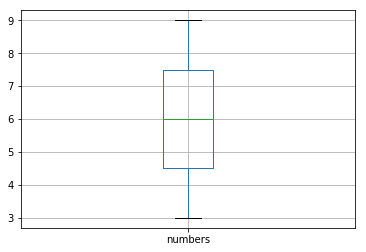

In [36]:
# box and whisker plot
bp = dataFrame.boxplot(column=['numbers'])


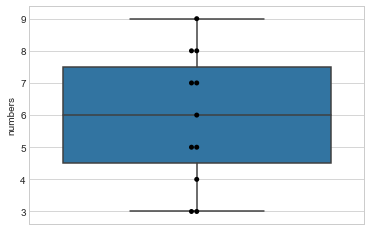

In [37]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(y=dataFrame['numbers'])
ax = sns.swarmplot(y=dataFrame['numbers'], color='k')

In [38]:
# All the numbers above fit within 1.5 IQR. Here's a data set with outliers

dataFrame = pd.DataFrame({'numbers':[-20, 3, 3, 4, 5, 5, 6, 7, 7, 8, 8, 9]})
dataFrame

,numbers
0,-20
1,3
2,3
3,4
4,5
5,5
6,6
7,7
8,7
9,8


In [39]:
dataFrame.describe()

,numbers
count,12.00
mean,3.75
std,7.74
min,-20.00
25%,3.75
50%,5.50
75%,7.25
max,9.00


In [40]:
# interquartile range
iqr = 7.25 - 3.75
iqr

3.5

In [41]:
iqr_15 = 3.5 * 1.5
iqr_15

5.25

In [42]:
print(7.25 + iqr_15)
print(3.5 - iqr_15)

12.5
-1.75


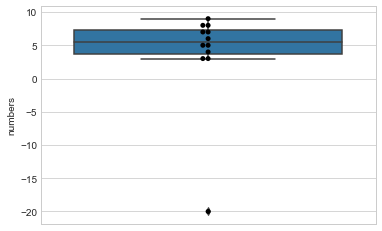

In [43]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(y=dataFrame['numbers'])
ax = sns.swarmplot(y=dataFrame['numbers'], color='k')
# we can see outliers - 1.5IQR registered on whisker plot

In [44]:
dataFrame.describe()

,numbers
count,12.00
mean,3.75
std,7.74
min,-20.00
25%,3.75
50%,5.50
75%,7.25
max,9.00


Outliers are set to 1.5 * IQR as default with the *whis* parameter shown below

seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)¶

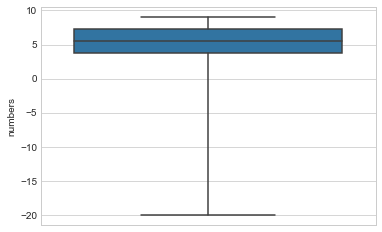

In [45]:
# if we know something special about our data, and want to change
# this number we can
# IQR = 7 for whiskers...
ax = sns.boxplot(y=dataFrame['numbers'], whis=7.0)

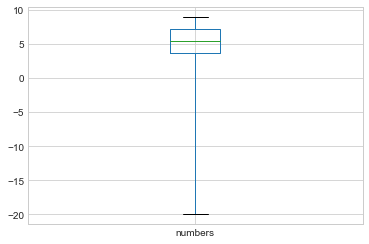

In [46]:
bp = dataFrame.boxplot(column=['numbers'], whis=7.0)


## Removing Outliers ##

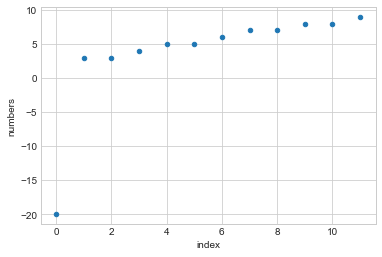

In [47]:
dataFrame.reset_index().plot(kind='scatter', x='index', y='numbers')

In [48]:
lower = dataFrame['numbers'].quantile(.25)
upper = dataFrame['numbers'].quantile(.75)
#lower, upper = np.percentile(dataFrame, [25, 75])
iqr_15 = 1.5 * (upper - lower)
dataFrame['is_outlier'] = -dataFrame['numbers'].between(lower - iqr_15, upper + iqr_15)
dataFrame

,numbers,is_outlier
0,-20,True
1,3,False
2,3,False
3,4,False
4,5,False
5,5,False
6,6,False
7,7,False
8,7,False
9,8,False


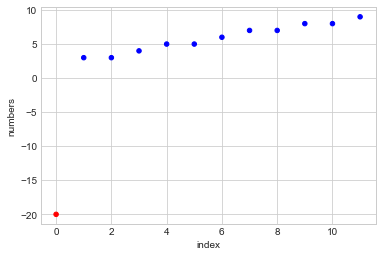

In [49]:
colors = {True:'red', False:'blue' }
dataFrame.reset_index().plot(kind='scatter', x='index', y='numbers',
                            c=dataFrame['is_outlier'].apply(lambda x: colors[x]))

In [50]:
dataFrame = dataFrame[dataFrame['is_outlier'] != True]
# or dataFrame = dataFrame[dataFrame['numbers'].between(lower - iqr_15, upper + iqr_15)]

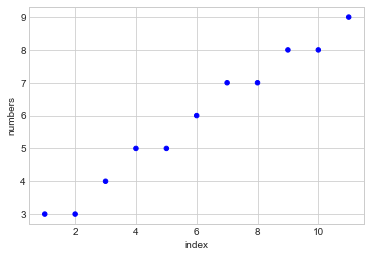

In [51]:
colors = {True:'red', False:'blue' }
dataFrame.reset_index().plot(kind='scatter', x='index', y='numbers',
                            c=dataFrame['is_outlier'].apply(lambda x: colors[x]))